<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Exploratory Data Analysis - Laptop Pricing

## Objectives
This lab covers the following:

* Visualize individual feature patterns
* Run descriptive statistical analysis on the dataset
* Use groups and pivot tables to find the effect of categorical variables on price
* Use Pearson Correlation to measure the interdependence between variables

## Loading libraries and data set

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# Read data set and save into a dataframe
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [3]:
# View the first 5 values of the dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Task 1 - Visualize individual feature patterns

#### Continuous values features
Generate regression plots for each of the parameters against "Price";
* "CPU_frequency"
* "Screen_Size_inch"
* "Weight_pounds"

Also, print the value of correlation of each feature with "Price".

(0.0, 3974.15)

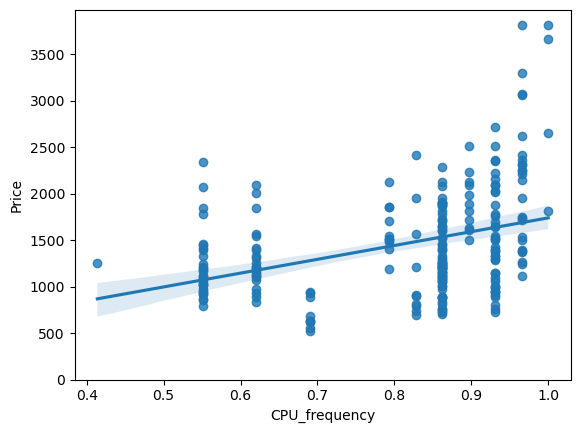

In [4]:
# Create a scatter plot of CPU_frequency and price columns
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

In [8]:
# Find the correlation between CPU_frequency and price columns
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


(0.0, 3974.15)

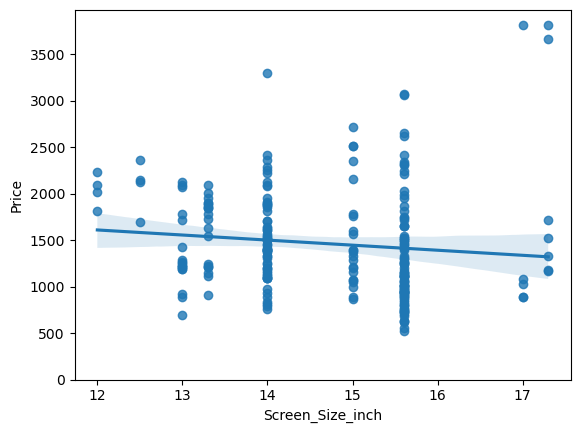

In [7]:
# Create a scatter plot of Screen_Size_inch and price columns
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

In [9]:
# Find the correlation between Screen_Size_inch and price columns
df[["Screen_Size_inch", "Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


(0.0, 3974.15)

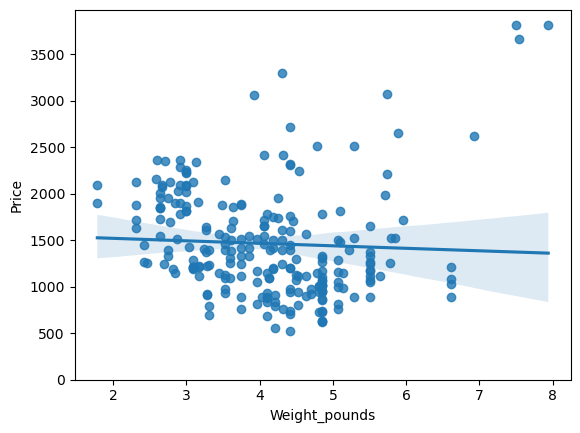

In [10]:
# Create a scatter plot of Weight_pounds and price columns
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [11]:
# Find the correlation between Weight_pounds and price columns
df[["Weight_pounds", "Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [12]:
# Correlate values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


#### Categorical features

Generate Box plots for the different feature that hold categorical values. These features would be:
* "Category"
* "GPU"
* "OS",
* "CPU_core"
* "RAM_GB"
* "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

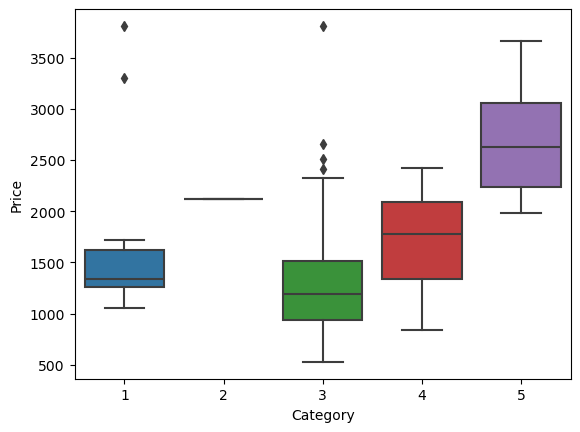

In [13]:
# Create a box plot to look at the relationship between category and price
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

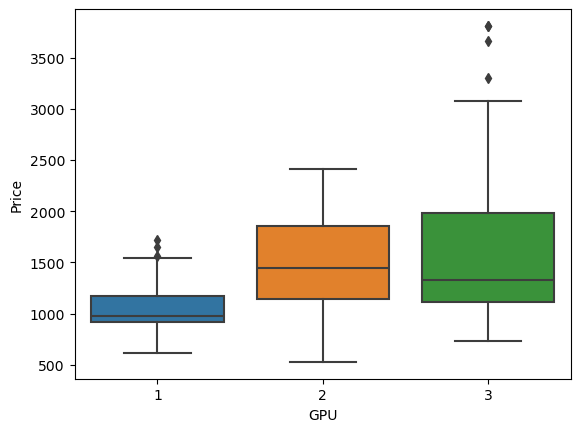

In [14]:
# Create a box plot to look at the relationship between GPU and price
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

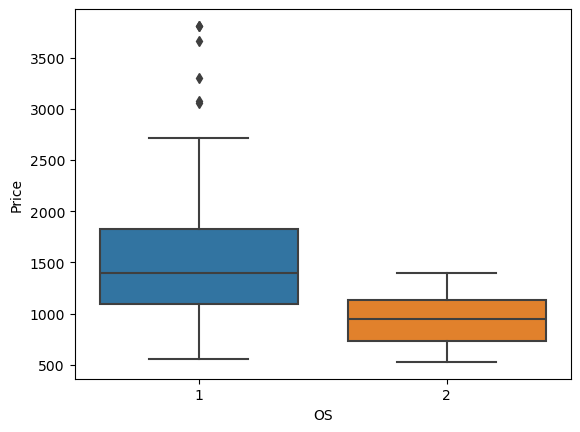

In [15]:
# Create a box plot to look at the relationship between OS and price
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

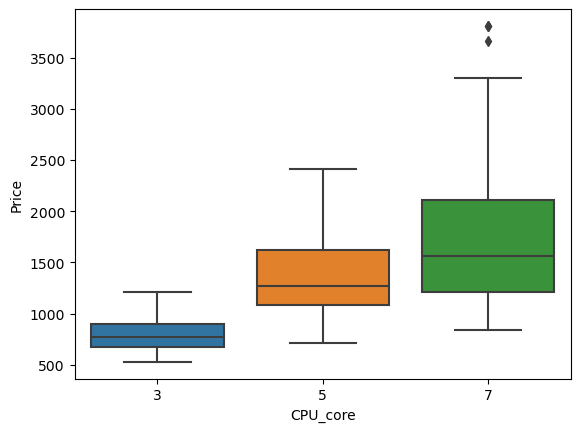

In [16]:
# Create a box plot to look at the relationship between CPU_core and price
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

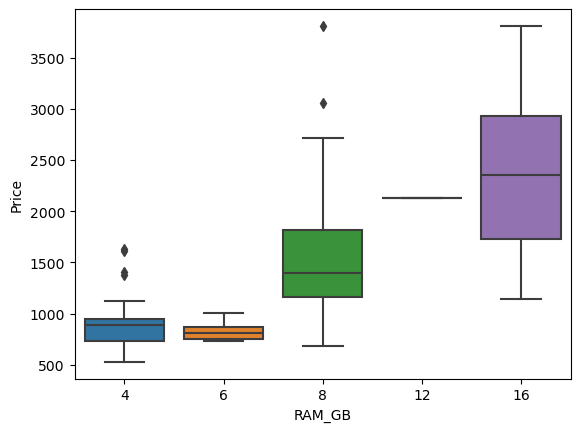

In [18]:
# Create a box plot to look at the relationship between RAM_GB and price
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

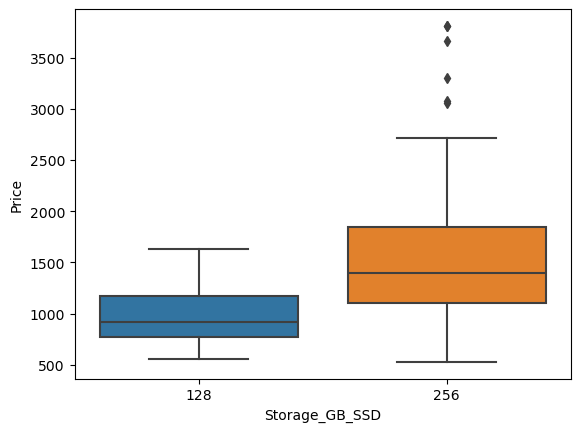

In [19]:
# Create a box plot to look at the relationship between Storage_GB_SSD and price
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

## Task 2 - Descriptive Statistical analysis

Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [20]:
# View basis statistics for all continuous variables
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [21]:
# View basic statistics for object variables
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


## Task 3 - GroupBy and Pivot tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [24]:
# Group variables based on categories
df_group_three = df[['GPU','CPU_core','Price']]
df_group_three = df_group_three.groupby(['GPU','CPU_core'],as_index=False).mean()
df_group_three

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [25]:
grouped_pivot = df_group_three.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

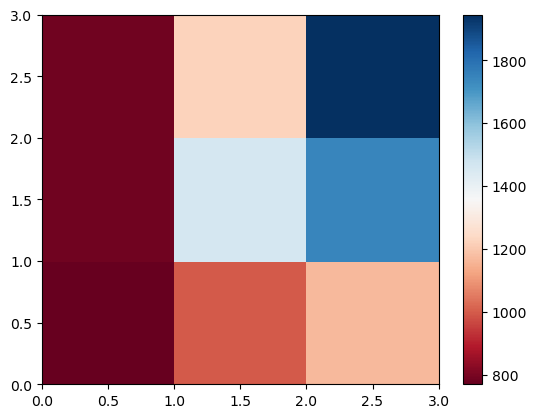

In [26]:
# Create a default heat map to visualize the relationship between GPU and CPU_core
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

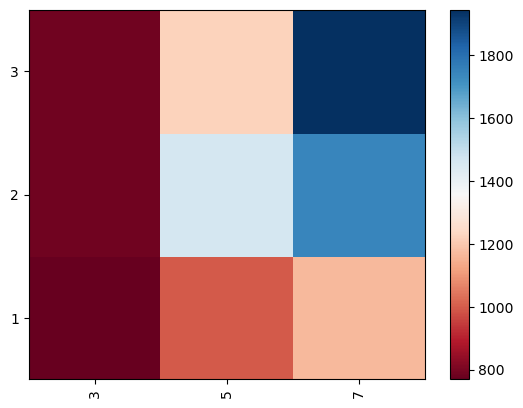

In [27]:
# Make visual improvements to heat map
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Define label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Task 4 - Pearson Correlation and p-values

Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [31]:
# Calculate Pearson Coefficient and the p-values for each parameter tested above
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857846  with a P-value of P = 3.68156062884271e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3666655589258864  with a P-value of P = 5.502463350713164e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191724217
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830661
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751544  with a P-value of P = 0.4397693853433894
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355116  with a P-value of P = 7.912950127009033e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482737  with a P-value of P = 0.0005696642559246747
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814257  with